# Project 3: Suicide Watch

## Notebook 2: Exploratory Data Analysis

This notebook contains the codes to visualise the data from depression and suicide subreddits. Some data visualisations include:

* Barplots
* Venn Diagrams
* Word Clouds

Data are visualised using lemmatized posts and using both vectorization transformers, CountVectorizer and Tfidf Vectorizer.

### Contents
- [EDA of Features](#EDA-of-Features)
    * [EDA Using Count Vectorizer](#EDA-Using-Count-Vectorizer)
    * [EDA Using Tfidf Vectorizer](#EDA-Using-Tfidf-Vectorizer)


In [1]:
# Install if matplotlib_venn has not been installed
# !pip3 install matplotlib_venn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib_venn import venn2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from PIL import Image

%matplotlib inline

### EDA of Features

In [3]:
# Import preprocessed data
df_prep = pd.read_csv('../datasets/preprocessed.csv')
df_prep.head()

,post_lem,post_stem,suicide
0,ask kindly stop make tea read text p...,ask kindli stop make tea read text p...,1
1,u ryfflex still please let know year ...,u ryfflex still pleas let know year a...,1
2,broken kid like mei see many people like ...,broken kid like mei see mani peopl like ...,1
3,anyone angry bitter time tolerate anybo...,anyon angri bitter time toler anybodi ...,1
4,could use someone talk,could use someon talk,1


#### EDA Using Count Vectorizer

In [4]:
# Extract depression posts
depression = df_prep[df_prep['suicide']==0]['post_lem']
depression.head()

978     hate   much   try  express  feeling   parent ...
979      tired  caring   people   one caring   seems ...
980     went   hospital     really bad panic attack  ...
981     ever get asked     see   five year question  ...
982     secretly   want  antidepressant medication  w...
Name: post_lem, dtype: object

In [5]:
# Extract suicide posts
suicide = df_prep[df_prep['suicide']==1]['post_lem']
suicide.head()

0     ask  kindly  stop     make tea  read  text  p...
1     u ryfflex    still   please let  know   year ...
2       broken kid like mei see  many people  like ...
3     anyone angry  bitter   time    tolerate anybo...
4                             could use someone  talk 
Name: post_lem, dtype: object

In [6]:
# Function to count vectorize and place the count of words into a dataframe
def count_words(data, num):
    
    # Instantiate CountVectorizer with stopwords to remove them
    cv_stop = CountVectorizer(stop_words = 'english')
    # Fit and transform the data with Count Vectorizer
    data_cv = cv_stop.fit_transform(data).todense()
    # Change it into dataframe
    data_cv_df = pd.DataFrame(data_cv, columns = cv_stop.get_feature_names())
    
    # Get a column containing the count of words called total and 
    # create a new dataframe with only the total and word columns
    data_total = pd.DataFrame(data_cv_df.sum(axis=0), columns=['total']).reset_index()
    data_total.rename({'index': 'word'}, axis=1, inplace=True)
    
    # Get the top 20 words in the subreddit
    top_data = data_total.sort_values(by='total', ascending=False).head(num)
    return top_data

In [7]:
top_depression = count_words(depression, 25)
top_suicide = count_words(suicide, 25)

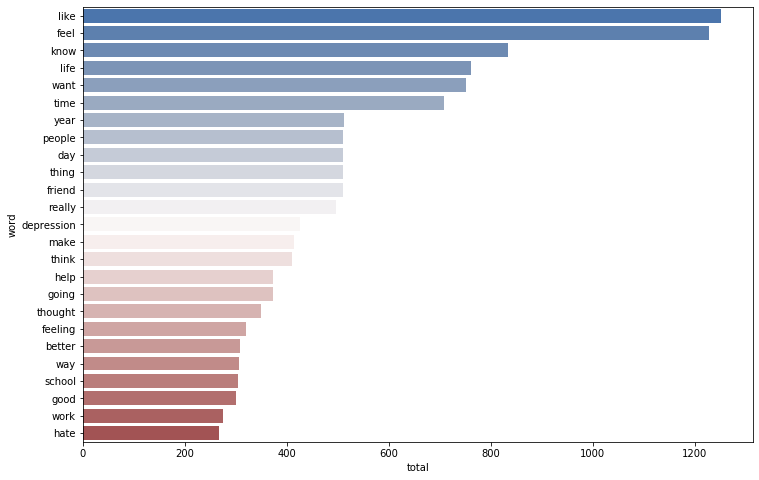

In [8]:
# Plot bar chart to see top words for depression
plt.figure(figsize=(12,8))
sns.barplot(x='total', y='word', data=top_depression, palette='vlag');

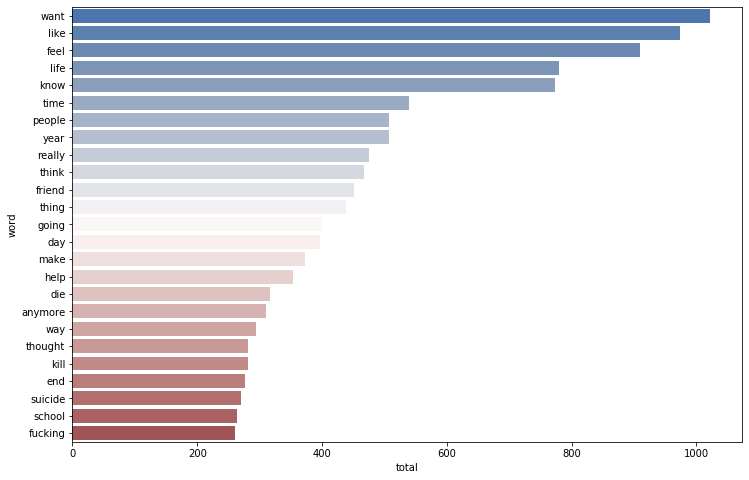

In [9]:
# Plot bar chart to see top words for suicide posts
plt.figure(figsize=(12,8))
sns.barplot(x='total', y='word', data=top_suicide, palette='vlag');

The top 5 words - like, feel, want, know and life - appear in both depression and suicide, showing that the two subreddits are very similar in nature. We can plot a Venn diagram next to see which words appear in both subreddits and which words do not, to see the determining words in looking out for a suicidal individual.

The Venn Diagram below shows the top 25 words for both subreddits.


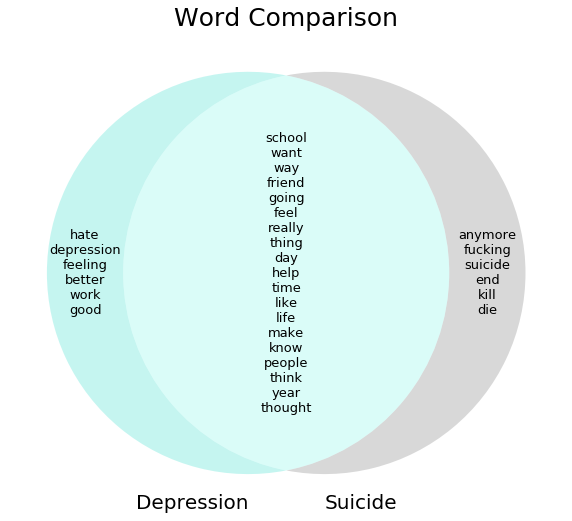

In [10]:
# Plot venn diagram to see overlaps between the two subreddits
# Set figure size and title
plt.figure(figsize=(10,10))
plt.title('Word Comparison',fontsize=25)

set_1 = set(top_depression['word'])
set_2 = set(top_suicide['word'])

venn = venn2([set_1,set_2],set_labels=['Depression','Suicide'], set_colors=('turquoise', 'gray'), alpha=0.3)

venn.get_label_by_id('100').set_text('\n'.join(map(str,set_1-set_2)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_1&set_2)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_2-set_1)))

venn.get_label_by_id('A').set_size(20)
venn.get_label_by_id('B').set_size(20)
venn.get_label_by_id('100').set_size(13)
venn.get_label_by_id('110').set_size(13)
venn.get_label_by_id('010').set_size(13)

print('The Venn Diagram below shows the top 25 words for both subreddits.')

#### EDA Using Tfidf Vectorizer

In [11]:
# Function to Tfidf vectorize and place the count of words into a dataframe
def count_words_tf(data, num):
    
    # Instantiate CountVectorizer with stopwords to remove them
    tf_stop = TfidfVectorizer(stop_words = 'english')
    # Fit and transform the data with Count Vectorizer
    data_tf = tf_stop.fit_transform(data).todense()
    # Change it into dataframe
    data_tf_df = pd.DataFrame(data_tf, columns = tf_stop.get_feature_names())
    
    # Get a column containing the count of words called total and 
    # create a new dataframe with only the total and word columns
    data_total = pd.DataFrame(data_tf_df.sum(axis=0), columns=['total']).reset_index()
    data_total.rename({'index': 'word'}, axis=1, inplace=True)
    
    # Get the top 20 words in the subreddit
    top_data = data_total.sort_values(by='total', ascending=False).head(num)
    return top_data

In [12]:
top_depression_tf = count_words_tf(depression, 25)
top_suicide_tf = count_words_tf(suicide, 25)

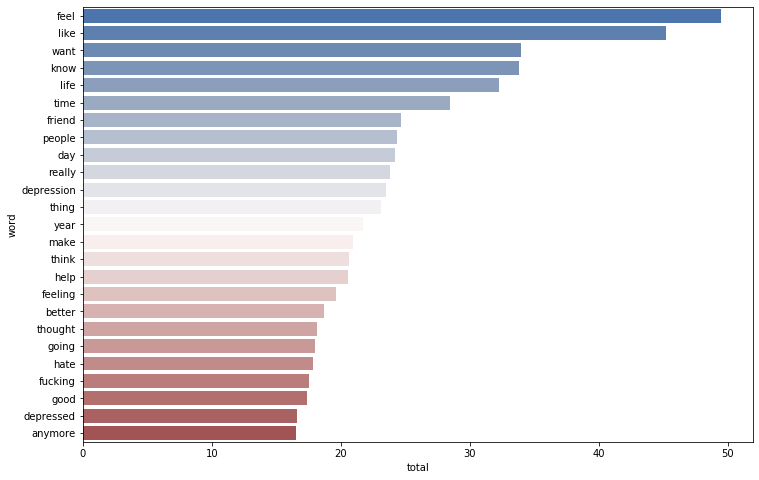

In [13]:
# Plot bar chart to see top words for depression
plt.figure(figsize=(12,8))
sns.barplot(x='total', y='word', data=top_depression_tf, palette='vlag');

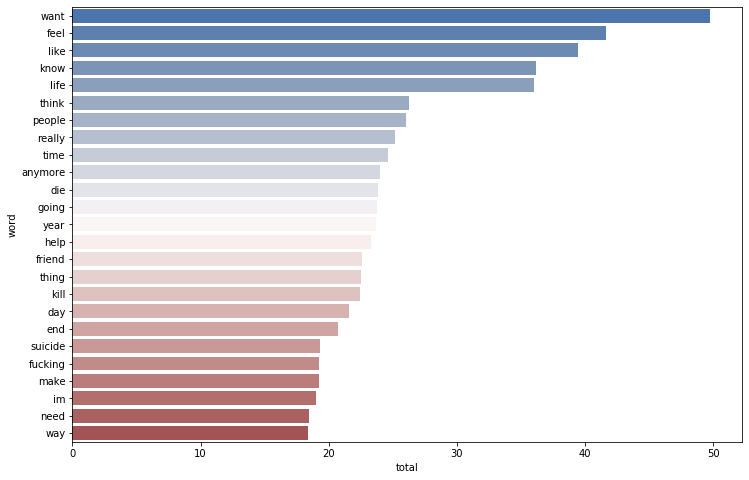

In [14]:
# Plot bar chart to see top words for suicide posts
plt.figure(figsize=(12,8))
sns.barplot(x='total', y='word', data=top_suicide_tf, palette='vlag');

The result is only slightly different than the CountVectorizer's. There are shuffling of positions of words but the top 5 words remain the same. Even though the top words are common words, they tend to correspond with emotions and feelings which are crucial when it comes to suicidal thoughts.

The Venn Diagram below shows the top 25 words for both subreddits.


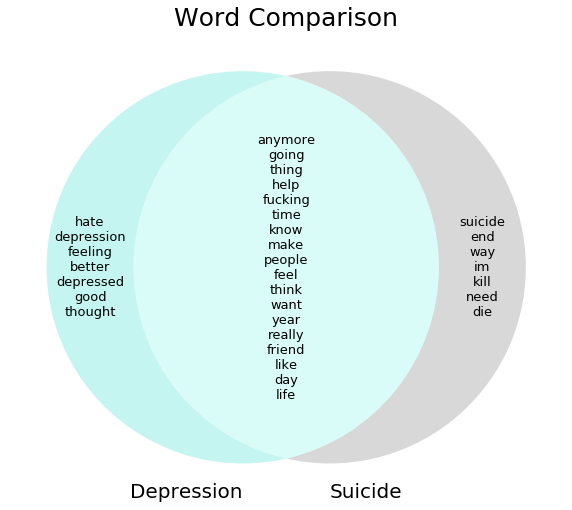

In [21]:
# Plot venn diagram to see overlaps between the two subreddits
# Set figure size and title
plt.figure(figsize=(10,10))
plt.title('Word Comparison',fontsize=25)

set_1 = set(top_depression_tf['word'])
set_2 = set(top_suicide_tf['word'])

venn = venn2([set_1,set_2],set_labels=['Depression','Suicide'], set_colors=('turquoise', 'gray'), alpha=0.3)

venn.get_label_by_id('100').set_text('\n'.join(map(str,set_1-set_2)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_1&set_2)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_2-set_1)))

venn.get_label_by_id('A').set_size(20)
venn.get_label_by_id('B').set_size(20)
venn.get_label_by_id('100').set_size(13)
venn.get_label_by_id('110').set_size(13)
venn.get_label_by_id('010').set_size(13)

print('The Venn Diagram below shows the top 25 words for both subreddits.')

**Comparison between Count and Tfidf Vectorizer Venn Diagrams:**

We see the word 'anymore' move from the suicide-only part of the Venn diagram to the intersecting part. Words that make it into the suicide-only part are 'way', 'need', and 'im'. So these words could have appeared less in absolute terms, which is why they did not appear in the Count Vectorizer's list of top words. Perhaps they would be of more significant use for the model to predict the classifications. 

#### Word Cloud
Let's explore more of the most frequently occuring words in the suicide and depression posts.

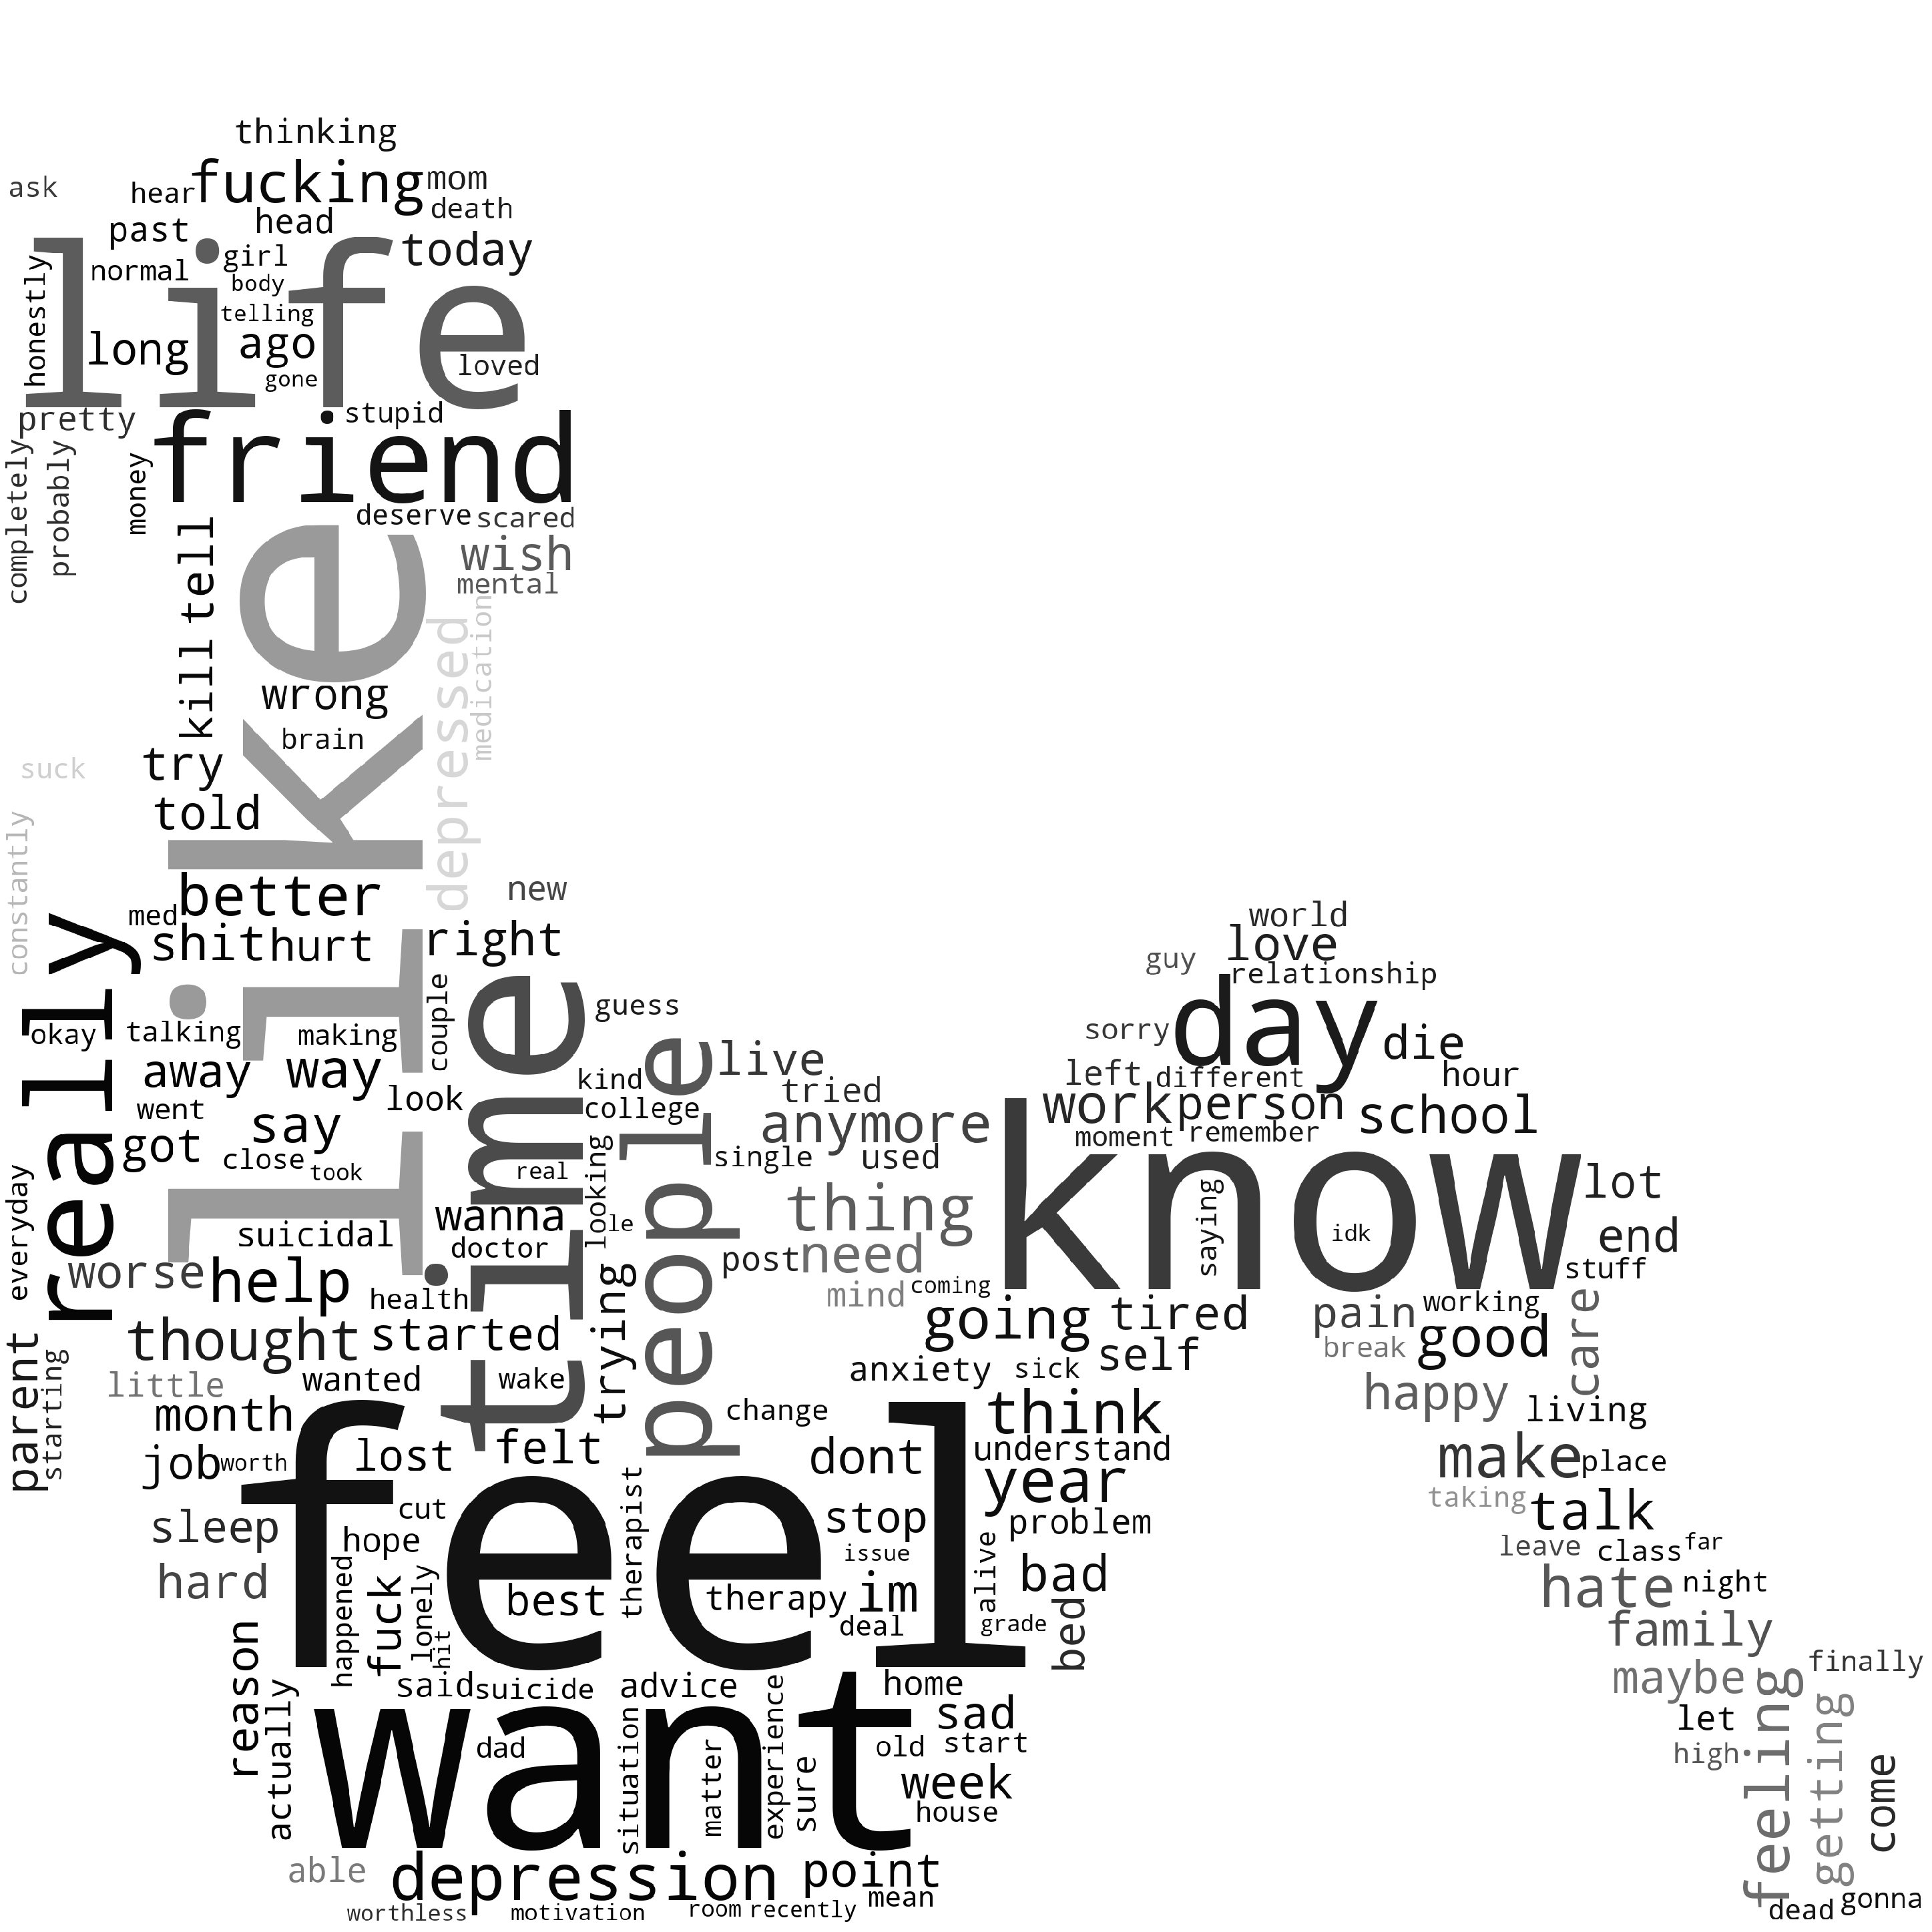

In [16]:
# Select 500 top words from suicide posts
text = count_words_tf(depression, 500)
textdict = dict(zip(text['word'],text['total']))

# Load the image mask and colour
mask = np.array(Image.open("../images/depression.png"))

# Make the figure
wc = WordCloud(
    width = 3000,
    height = 3000,
    background_color = 'white',
    mask=mask,
    stopwords = STOPWORDS
).generate_from_frequencies(textdict)

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='w', edgecolor='w', frameon=False)
image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.tight_layout(pad=0)

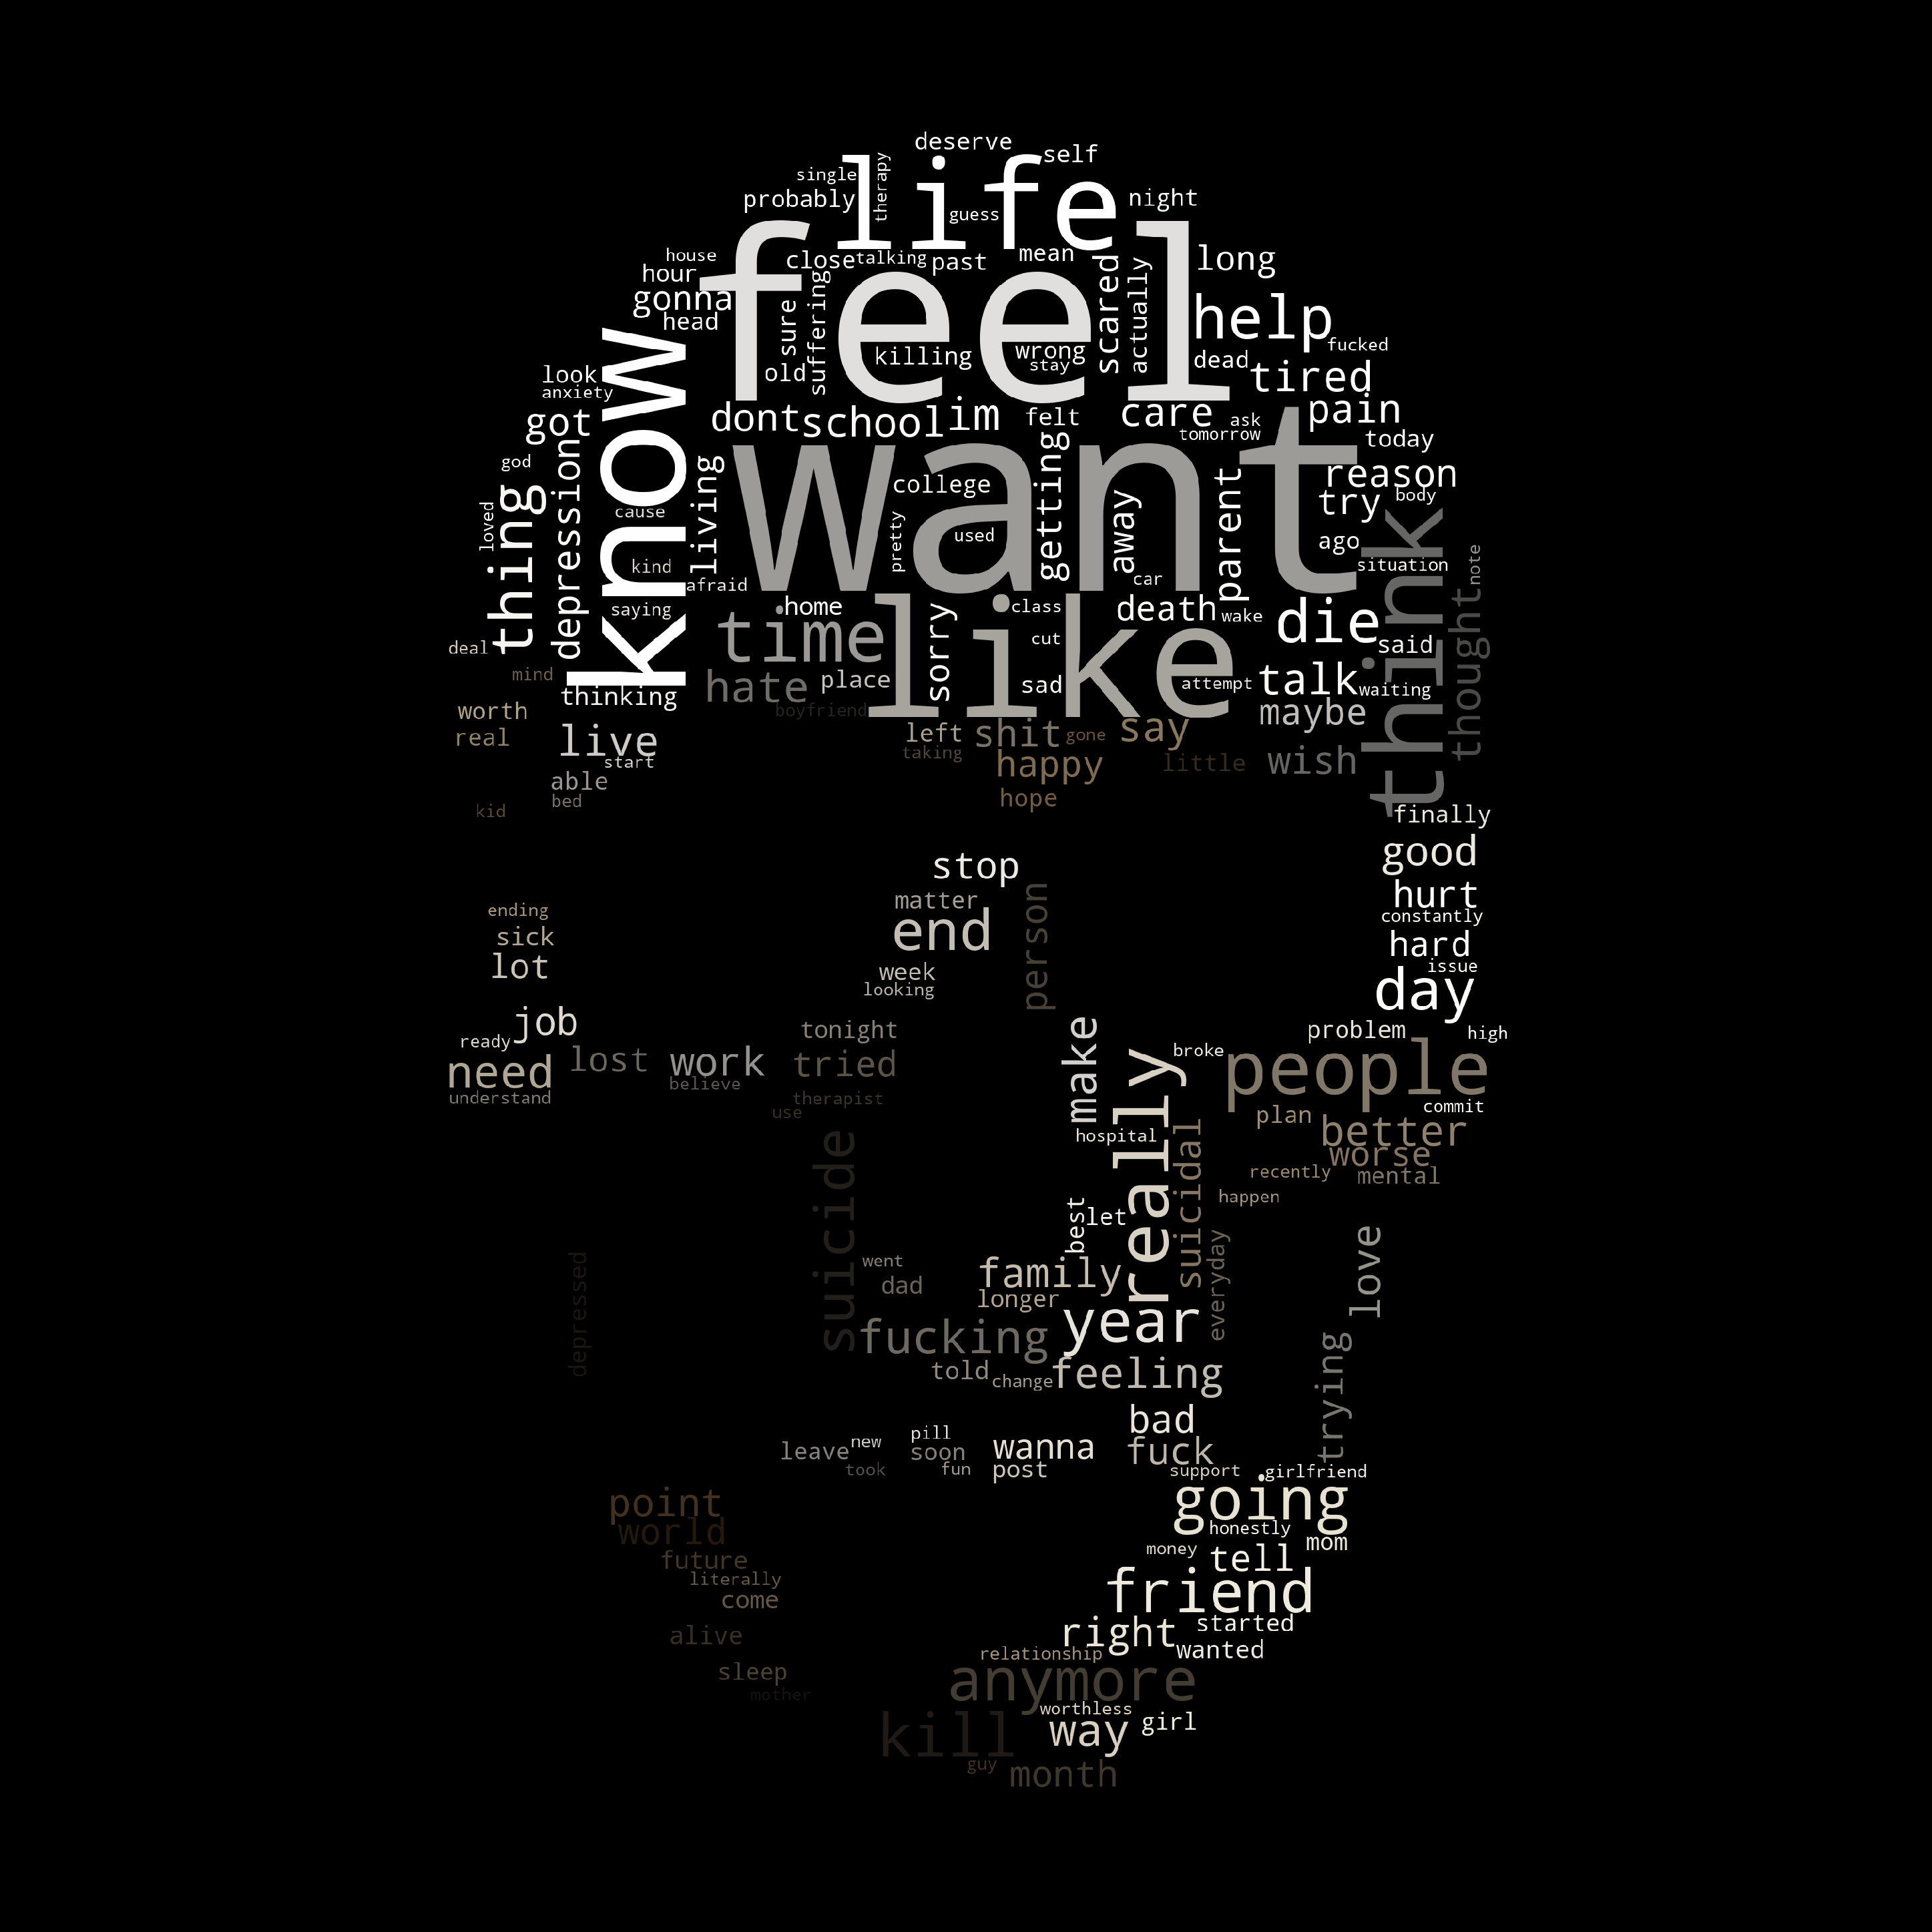

In [17]:
# Select 500 top words from suicide posts
text = count_words_tf(suicide, 500)
textdict = dict(zip(text['word'],text['total']))

# Load the image mask and colour
mask = np.array(Image.open("../images/skullinv.jpg"))
color = np.array(Image.open("../images/skull.jpg"))

# Make the figure
wc = WordCloud(
    width = 3000,
    height = 3000,
    background_color = 'black',
    mask=mask,
    stopwords = STOPWORDS
).generate_from_frequencies(textdict)

# Create figure
fig = plt.figure(figsize = (40, 40), facecolor = '0', edgecolor = 'k')
image_colors = ImageColorGenerator(color)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.tight_layout(pad=0)

## To be continued in Notebook 3: Model Selection and Optimisation